In [1]:
.+# load libraries and dataset
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import os
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Jwpel\Documents\DSC680\change_detection_data.csv")

# Exploratory Data Analysis

In [7]:
# shape of dataset
df.shape

(2284230, 7)

In [8]:
# dataframe view
df.head()

,turbine_id,local_dttm,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value
0,50432,2020-01-01 00:08:53,0.0,-13.17321,NaN,-13.19535,NaN
1,50432,2020-01-01 00:18:54,0.0,-13.17390,NaN,-13.19547,NaN
2,50432,2020-01-01 00:28:54,0.0,-13.17326,NaN,-13.19555,NaN
3,50432,2020-01-01 00:38:54,0.0,-13.17356,NaN,-13.19558,NaN
4,50432,2020-01-01 00:48:53,0.0,-13.17399,NaN,-13.19605,NaN


In [18]:
# view datatype for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2284230 entries, (50432, '2020-01-01 00:08:53') to (52234, '2020-05-23 21:11:16')
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   turbine_state   float64
 1   sensor1_health  float64
 2   sensor1_value   float64
 3   sensor2_health  float64
 4   sensor2_value   float64
dtypes: float64(5)
memory usage: 114.1+ MB


In [318]:
# descriptive statistics on columns
df.describe()
# remove scientific format
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,turbine_id,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value
count,2.28423e+06,2.25032e+06,2.26467e+06,1.57219e+06,2.26575e+06,1.57104e+06
mean,50662.2,1.30364,-12.906,0.00304208,-13.0087,0.00539665
std,475.297,1.91893,1.27541,0.00242609,1.37937,0.00452951
min,50432,0,-22.7951,0,-22.8538,0
25%,50454,0,-13.1336,0.00139715,-13.2195,0.0025195
50%,50477,0,-13.046,0.00226852,-13.1147,0.00438023
75%,50661,3,-12.9403,0.00383725,-13.0111,0.00702298
max,52234,5,0,0.0845186,0,0.170517


In [20]:
# missing values
df.isna().sum()

turbine_state      33909
sensor1_health     19558
sensor1_value     712041
sensor2_health     18481
sensor2_value     713189
dtype: int64

In [21]:
# counts of categorical values of turbine_state
df['turbine_state'].value_counts()

0.0    1392889
5.0     344878
1.0     151407
2.0     133232
3.0     120322
4.0     107593
Name: turbine_state, dtype: int64

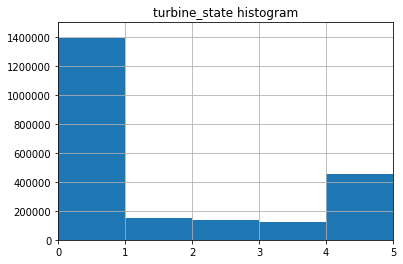

In [24]:
# histogram for turbine_state
plt.ylim(0, 1500000)
plt.xlim(0, 5)
plt.title("turbine_state histogram")
df['turbine_state'].hist(bins=5)

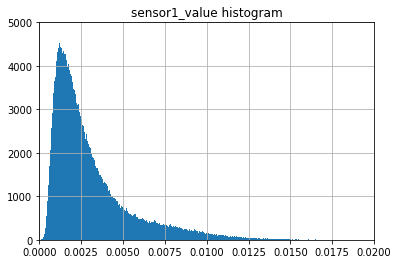

In [12]:
# histogram for sensor1_value
plt.ylim(0, 5000)
plt.xlim(0,.02)
plt.title("sensor1_value histogram")
df['sensor1_value'].hist(bins = 10000)

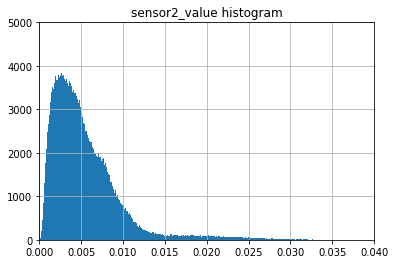

In [13]:
# histogram for sensor2_value
plt.ylim(0, 5000)
plt.xlim(0,.04)
plt.title("sensor2_value histogram")
df['sensor2_value'].hist(bins = 10000)

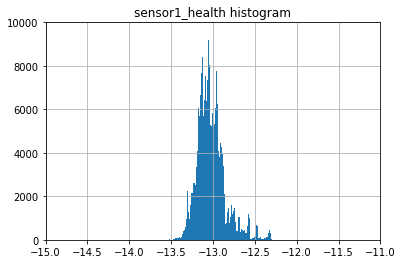

In [474]:
# histogram for sensor1_health
plt.ylim(0, 10000)
plt.xlim(-15, -11)
plt.title("sensor1_health histogram")
df['sensor1_health'].hist(bins = 20000)

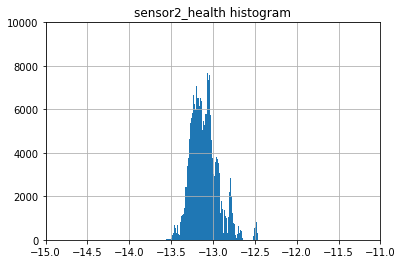

In [475]:
# histogram for sensor2_health
plt.ylim(0, 10000)
plt.xlim(-15, -11)
plt.title("sensor2_health histogram")
df['sensor2_health'].hist(bins = 20000)

(0, 0.05)

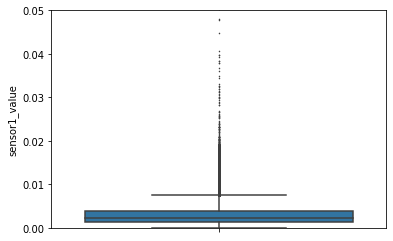

In [34]:
# boxplot for sensor1_value
ax = sns.boxplot(x=df['sensor1_value'], orient = "v", fliersize=.7)
plt.ylim(0, .05)

(0, 0.05)

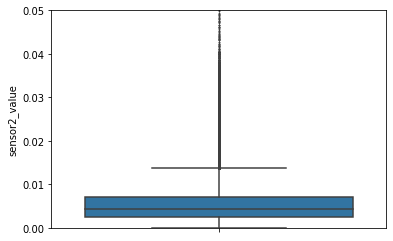

In [36]:
# boxplot for sensor2_value
ax = sns.boxplot(x=df['sensor2_value'], orient = "v", fliersize=.7)
plt.ylim(0,.05)

(-14, -12)

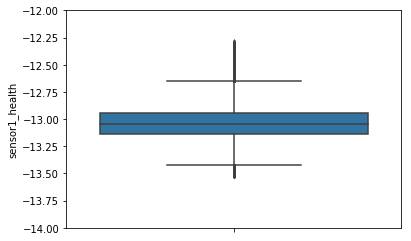

In [477]:
#boxplot for sensor1_health
ax = sns.boxplot(x=df['sensor1_health'], orient = "v", fliersize=.7)
plt.ylim(-14, -12)

(-14, -12)

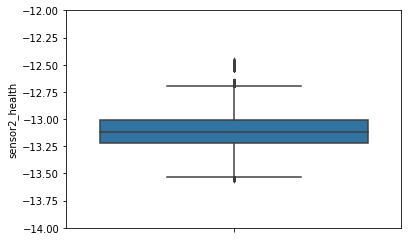

In [478]:
# boxplot for sensor2_health
ax = sns.boxplot(x=df['sensor2_health'], orient = "v", fliersize=.7)
plt.ylim(-14, -12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023200F78848>,
      dtype=object)

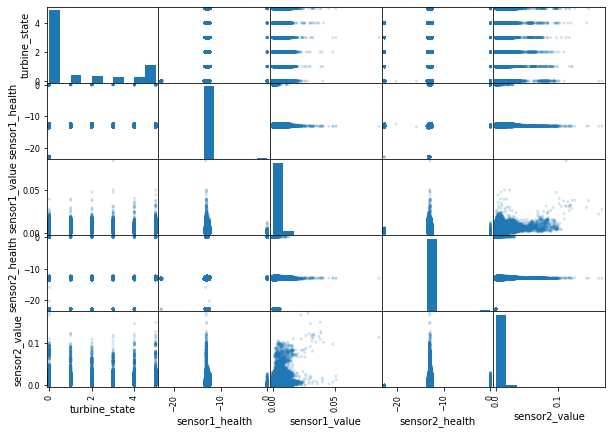

In [24]:
#scatterplot matrix of columns
scatter_matrix(df, alpha = 0.2, figsize = (10,7))

Text(0.5, 1.0, 'Scatter Plot sensor1_value and sensor2_value')

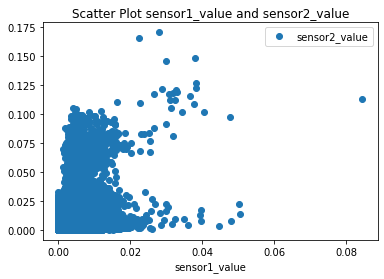

In [16]:
#scatterplot matrix of columns
df.plot(x='sensor1_value', y='sensor2_value', style='o')
plt.title("Scatter Plot sensor1_value and sensor2_value")

Text(0.5, 1.0, 'Scatter Plot sensor1_value and turbine_state')

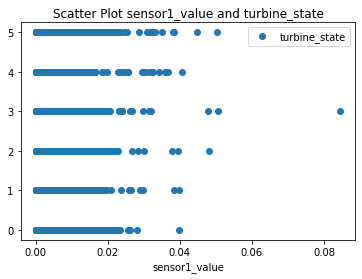

In [17]:
#scatterplot matrix of columns
df.plot(x='sensor1_value', y='turbine_state', style='o')
plt.title("Scatter Plot sensor1_value and turbine_state")

Text(0.5, 1.0, 'Scatter Plot sensor2_value and turbine_state')

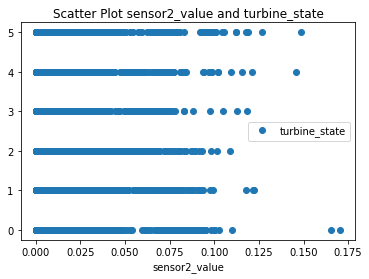

In [20]:
#scatterplot matrix of columns
df.plot(x='sensor2_value', y='turbine_state', style='o')
plt.title("Scatter Plot sensor2_value and turbine_state")

In [325]:
# correlation matrix 
df_corr = df.drop("turbine_id", 1)
corr = df_corr.corr()
corr

,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value
turbine_state,1.000000,-0.044107,0.270508,-0.049193,0.385483
sensor1_health,-0.044107,1.000000,-0.142602,0.872686,-0.112319
sensor1_value,0.270508,-0.142602,1.000000,-0.133947,0.255997
sensor2_health,-0.049193,0.872686,-0.133947,1.000000,-0.095140
sensor2_value,0.385483,-0.112319,0.255997,-0.095140,1.000000


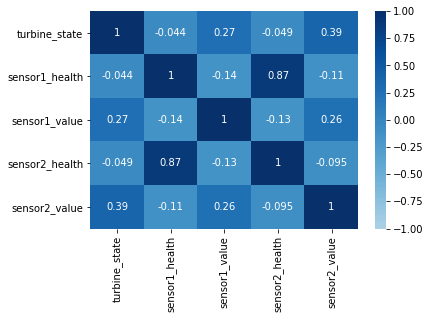

In [11]:
# heatmap of correlation matrix
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin = -1.0, vmax = 1.0,
        center = -.5, annot = True,
        cmap = "Blues")


# Preprocessing

In [3]:
# exclude records with sensor1_health values outside healthy range (healthy range between -14 to -12)
df_1 = df[(df['sensor1_health'] >= -14) & (df['sensor1_health'] <= -12 )]

In [6]:
# df shape after dropping unhealthy sensor1_health values
df_1.shape

(2242697, 7)

In [4]:
# exclude records with sensor2_health values outside healthy range -14 to -12
df_2 = df_1[(df_1['sensor2_health'] >= -14) & (df_1['sensor2_health'] <= -12 )]

In [8]:
# df shape after dropping unhealthy sensor1_health and sensor2_health values
df_2.shape

(2225802, 7)

In [9]:
df_2.head()

,turbine_id,local_dttm,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value
0,50432,2020-01-01 00:08:53,0.0,-13.17321,NaN,-13.19535,NaN
1,50432,2020-01-01 00:18:54,0.0,-13.17390,NaN,-13.19547,NaN
2,50432,2020-01-01 00:28:54,0.0,-13.17326,NaN,-13.19555,NaN
3,50432,2020-01-01 00:38:54,0.0,-13.17356,NaN,-13.19558,NaN
4,50432,2020-01-01 00:48:53,0.0,-13.17399,NaN,-13.19605,NaN


In [5]:
# set tge index if dataframe by turbine_id 
df_idx = df_2.set_index("turbine_id")

In [6]:
# create new dataframe for turbine_id 50432 time series
df_50432 = df_idx.loc[50432]

In [12]:
df_50432.head()

,local_dttm,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value
turbine_id,,,,,,
50432,2020-01-01 00:08:53,0.0,-13.17321,NaN,-13.19535,NaN
50432,2020-01-01 00:18:54,0.0,-13.17390,NaN,-13.19547,NaN
50432,2020-01-01 00:28:54,0.0,-13.17326,NaN,-13.19555,NaN
50432,2020-01-01 00:38:54,0.0,-13.17356,NaN,-13.19558,NaN
50432,2020-01-01 00:48:53,0.0,-13.17399,NaN,-13.19605,NaN


In [28]:
df_50432.shape

(25538, 6)

In [104]:
df_50432_corr = df_50432.corr()
df_50432_corr

,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value
turbine_state,1.000000,0.447696,0.088583,0.265753,0.172513
sensor1_health,0.447696,1.000000,0.015597,0.866976,0.213735
sensor1_value,0.088583,0.015597,1.000000,0.007382,-0.027851
sensor2_health,0.265753,0.866976,0.007382,1.000000,0.083489
sensor2_value,0.172513,0.213735,-0.027851,0.083489,1.000000


In [7]:
# exclude records with missing values of sensor1_value
df_50432_na1 = df_50432[df_50432['sensor1_value'].notna()]

In [8]:
# exclude records with missing values of sensor2_value
df_50432_na2 = df_50432_na1[df_50432_na1['sensor2_value'].notna()]

In [9]:
df_50432_na2.head()

,local_dttm,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value
turbine_id,,,,,,
50432,2020-01-11 11:48:40,0.0,-13.21070,0.001313,-13.28666,0.003351
50432,2020-01-11 11:58:39,0.0,-13.19167,0.001132,-13.28789,0.001029
50432,2020-01-11 12:18:40,0.0,-13.14653,0.000598,-13.27973,0.000819
50432,2020-01-11 12:28:40,0.0,-13.13015,0.000940,-13.27320,0.001253
50432,2020-01-11 12:38:40,0.0,-13.13181,0.001314,-13.26800,0.000831


In [10]:
df_50432_na2.shape

(14431, 6)

In [26]:
# set index to local_dttm
df_50432_dtix = df_50432_na2.set_index('local_dttm')

In [11]:
# assign df_50432_na2 to new df to change local_dttm to datetime type
df_50432_dt = df_50432_na2

In [116]:
df_50432_dt.shape

(14431, 6)

In [221]:
df_50432_dt.head()

,local_dttm,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value
turbine_id,,,,,,
50432,2020-01-11 11:48:40,0.0,-13.21070,0.001313,-13.28666,0.003351
50432,2020-01-11 11:58:39,0.0,-13.19167,0.001132,-13.28789,0.001029
50432,2020-01-11 12:18:40,0.0,-13.14653,0.000598,-13.27973,0.000819
50432,2020-01-11 12:28:40,0.0,-13.13015,0.000940,-13.27320,0.001253
50432,2020-01-11 12:38:40,0.0,-13.13181,0.001314,-13.26800,0.000831


In [222]:
# reset index of the df
df_50432_dt_reset = df_50432_dt.reset_index()

In [235]:
df_50432_dt_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14431 entries, 0 to 14430
Data columns (total 7 columns):
turbine_id        14431 non-null int64
local_dttm        14431 non-null datetime64[ns]
turbine_state     14359 non-null float64
sensor1_health    14431 non-null float64
sensor1_value     14431 non-null float64
sensor2_health    14431 non-null float64
sensor2_value     14431 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 789.3 KB


In [12]:
# remove annoying warning about copying over slice of df
pd.options.mode.chained_assignment = None  # default='warn'

In [13]:
# change local_dttm column from object to datetime data type
df_50432_dt['local_dttm'] = pd.to_datetime(df_50432_dt['local_dttm'])

In [119]:
# resample df_50432, aggregate by min
df_50432_30min = df_50432_dt.resample('30min', on='local_dttm').mean()

In [187]:
# resample df_50432, aggregate by min
df_50432_10min = df_50432_dt.resample('10min', on='local_dttm').mean()

In [200]:
# resample df_50432, aggregate by min
df_432_10min_med = df_50432_dt.resample('10min', on='local_dttm').median()

In [120]:
df_50432_30min.shape

(8233, 5)

In [14]:
# resample df_50432, aggregate by hour
df_50432_hr = df_50432_dt.resample('60min', on='local_dttm').mean()

In [15]:
# resample df_50432, aggregate by day
df_50432_day = df_50432_dt.resample('1D', on='local_dttm').mean()

In [16]:
# assign a non-sampled df 
df_50432_min = df_50432_dt

In [185]:
df.head()

,turbine_id,local_dttm,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value
0,50432,2020-01-01 00:08:53,0.0,-13.17321,NaN,-13.19535,NaN
1,50432,2020-01-01 00:18:54,0.0,-13.17390,NaN,-13.19547,NaN
2,50432,2020-01-01 00:28:54,0.0,-13.17326,NaN,-13.19555,NaN
3,50432,2020-01-01 00:38:54,0.0,-13.17356,NaN,-13.19558,NaN
4,50432,2020-01-01 00:48:53,0.0,-13.17399,NaN,-13.19605,NaN


In [23]:
# df aggregated by hour
df_50432_hr

,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value
local_dttm,,,,,
2020-01-11 11:00:00,0.000000,-13.201185,0.001222,-13.287275,0.002190
2020-01-11 12:00:00,0.000000,-13.130836,0.000990,-13.264372,0.001104
2020-01-11 13:00:00,0.000000,-13.123875,0.001187,-13.245965,0.001784
2020-01-11 14:00:00,0.333333,-13.104523,0.001488,-13.230862,0.002420
2020-01-11 15:00:00,0.000000,-13.104628,0.001381,-13.232055,0.004320
2020-01-11 16:00:00,0.000000,-13.116905,0.001749,-13.254397,0.004236
2020-01-11 17:00:00,0.000000,-13.107812,0.001658,-13.253287,0.003698
2020-01-11 18:00:00,0.000000,-13.114537,0.001580,-13.258227,0.003293
2020-01-11 19:00:00,0.500000,-13.094930,0.001628,-13.236463,0.004427


In [24]:
# df aggregated by day
df_50432_day

,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value
local_dttm,,,,,
2020-01-11,0.136986,-13.109238,0.001511,-13.245186,0.003520
2020-01-12,0.000000,-13.112103,0.001674,-13.248900,0.004229
2020-01-13,0.030303,-13.126250,0.001260,-13.247602,0.002456
2020-01-14,NaN,NaN,NaN,NaN,NaN
2020-01-15,NaN,NaN,NaN,NaN,NaN
2020-01-16,NaN,NaN,NaN,NaN,NaN
2020-01-17,NaN,NaN,NaN,NaN,NaN
2020-01-18,NaN,NaN,NaN,NaN,NaN
2020-01-19,NaN,NaN,NaN,NaN,NaN


In [17]:
# remove local_dttm as index in hr df and assign to new df
df_50432_hr_1 = df_50432_hr.reset_index()

In [18]:
# remove local_dttm as index in day df and assign to new df
df_50432_day_1 = df_50432_day.reset_index()

In [19]:
# remove local_dttm as index in minutes df and assign to new df
df_50432_min_1 = df_50432_min.reset_index(drop = True)

In [29]:
df_50432_min_1.head()

,local_dttm,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value
0,2020-01-11 11:48:40,0.0,-13.21070,0.001313,-13.28666,0.003351
1,2020-01-11 11:58:39,0.0,-13.19167,0.001132,-13.28789,0.001029
2,2020-01-11 12:18:40,0.0,-13.14653,0.000598,-13.27973,0.000819
3,2020-01-11 12:28:40,0.0,-13.13015,0.000940,-13.27320,0.001253
4,2020-01-11 12:38:40,0.0,-13.13181,0.001314,-13.26800,0.000831


In [20]:
df_50432_min = df_50432_min_1

In [31]:
# hr df shape
df_50432_hr_1.shape

(4117, 6)

In [32]:
# day df shape
df_50432_day_1.shape

(172, 6)

In [47]:
df_50432_hr_1.head()

,local_dttm,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value
0,2020-01-11 11:00:00,0.000000,-13.201185,0.001222,-13.287275,0.002190
1,2020-01-11 12:00:00,0.000000,-13.130836,0.000990,-13.264372,0.001104
2,2020-01-11 13:00:00,0.000000,-13.123875,0.001187,-13.245965,0.001784
3,2020-01-11 14:00:00,0.333333,-13.104523,0.001488,-13.230862,0.002420
4,2020-01-11 15:00:00,0.000000,-13.104628,0.001381,-13.232055,0.004320


In [48]:
df_50432_day_1.head()

,local_dttm,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value
0,2020-01-11,0.136986,-13.109238,0.001511,-13.245186,0.003520
1,2020-01-12,0.000000,-13.112103,0.001674,-13.248900,0.004229
2,2020-01-13,0.030303,-13.126250,0.001260,-13.247602,0.002456
3,2020-01-14,NaN,NaN,NaN,NaN,NaN
4,2020-01-15,NaN,NaN,NaN,NaN,NaN


In [49]:
# missing values after resampling by hour
df_50432_hr_1.isna().sum()

local_dttm           0
turbine_state     1444
sensor1_health    1433
sensor1_value     1433
sensor2_health    1433
sensor2_value     1433
dtype: int64

In [50]:
# missing values after resampling by day
df_50432_day_1.isna().sum()

local_dttm         0
turbine_state     38
sensor1_health    38
sensor1_value     38
sensor2_health    38
sensor2_value     38
dtype: int64

In [21]:
# removing missing values in hr df, assign to new df
df_50432_hour = df_50432_hr_1.dropna(axis=0)

In [22]:
# remove missing values in day df, assign to new df
df_50432_day = df_50432_day_1.dropna(axis=0)

In [23]:
df_50432_hour.shape

(2673, 6)

In [24]:
df_50432_day.shape

(134, 6)

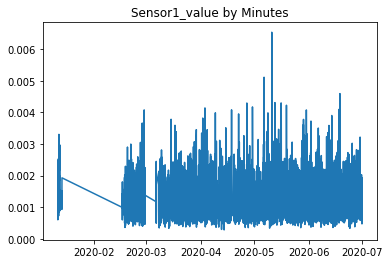

In [59]:
# time series line chart for sensor1_value by hour
plt.plot(df_50432_min['local_dttm'], df_50432_min['sensor1_value'])
plt.title("Sensor1_value by Minutes")
plt.show()

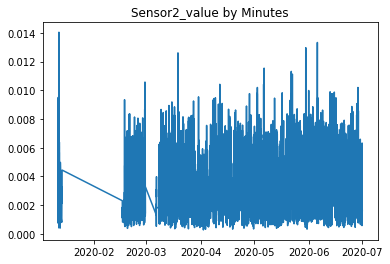

In [61]:
# time series line chart for sensor1_value by hour
plt.plot(df_50432_min['local_dttm'], df_50432_min['sensor2_value'])
plt.title("Sensor2_value by Minutes")
plt.show()

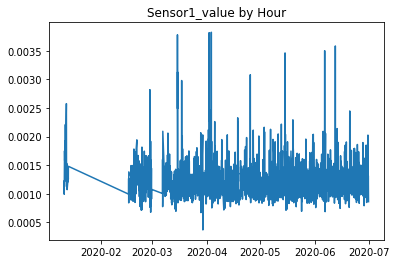

In [205]:
# time series line chart for sensor1_value by hour
plt.plot(df_50432_hour['local_dttm'], df_50432_hour['sensor1_value'])
plt.title("Sensor1_value by Hour")
plt.show()

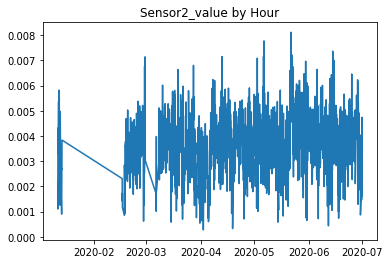

In [206]:
# time series line chart for sensor2_value by hour
plt.plot(df_50432_hour['local_dttm'], df_50432_hour['sensor2_value'])
plt.title("Sensor2_value by Hour")
plt.show()

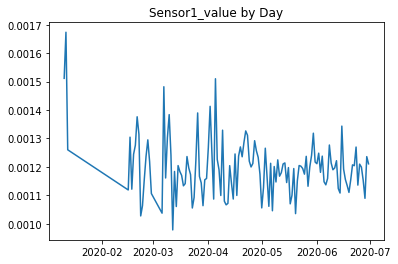

In [207]:
# time series line chart for sensor1_value by day
plt.plot(df_50432_day['local_dttm'], df_50432_day['sensor1_value'])
plt.title("Sensor1_value by Day")
plt.show()

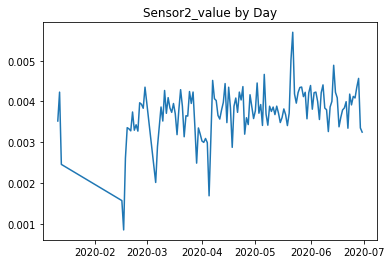

In [208]:
# time series line chart for sensor1_value by day
plt.plot(df_50432_day['local_dttm'], df_50432_day['sensor2_value'])
plt.title("Sensor2_value by Day")
plt.show()

# Regression Model

In [136]:
# import statsmodels module for regression 
import statsmodels.formula.api as sm

In [15]:
# remove annoying warning about copying over slice of df
pd.options.mode.chained_assignment = None  # default='warn'

In [139]:
# build regression model to create residual array for sensor1_value to run CPD on
# this adjusts for wind changes(turbine_state), autocorrelation and reduces false alarms
# create residuals and append them on minute df
result0 = sm.ols('sensor1_value ~ turbine_state + sensor2_value', df_50432_min).fit()
df_50432_min['yhat1'] = result0.fittedvalues
df_50432_min['resid1'] = result0.resid
print(result0.summary())

                            OLS Regression Results                            
Dep. Variable:          sensor1_value   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     70.35
Date:                Sat, 22 Aug 2020   Prob (F-statistic):           3.94e-31
Time:                        23:13:59   Log-Likelihood:                 90783.
No. Observations:               14359   AIC:                        -1.816e+05
Df Residuals:                   14356   BIC:                        -1.815e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0012   9.51e-06    126.992

Text(0.5, 1.0, 'Residuals for sensor1_value by Minutes')

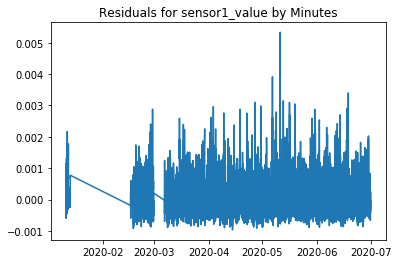

In [81]:
# Residuals plot for sensor1_value by minutes
plt.plot(df_50432_min['local_dttm'], df_50432_min['resid1'])
plt.title("Residuals for sensor1_value by Minutes")

In [140]:
# build regression model to create residual array for sensor2_value to run CPD on
# this adjusts for wind changes(turbine_state), autocorrelation and reduces false alarms
# create residuals and append them on minute df
result = sm.ols('sensor2_value ~ turbine_state + sensor1_value', df_50432_min).fit()
df_50432_min['yhat2'] = result.fittedvalues
df_50432_min['resid2'] = result.resid
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          sensor2_value   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sat, 22 Aug 2020   Prob (F-statistic):          1.21e-100
Time:                        23:15:01   Log-Likelihood:                 72233.
No. Observations:               14359   AIC:                        -1.445e+05
Df Residuals:                   14356   BIC:                        -1.444e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0038    3.9e-05     98.202

Text(0.5, 1.0, 'Residuals for sensor2_value by Minutes')

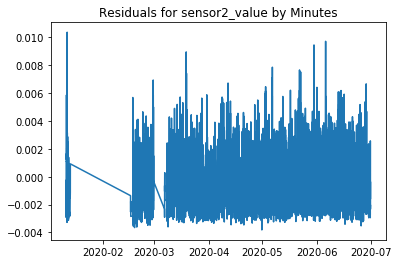

In [82]:
# Residuals plot for sensor2_value by minutes
plt.plot(df_50432_min['local_dttm'], df_50432_min['resid2'])
plt.title("Residuals for sensor2_value by Minutes")

In [141]:
# build regression model to create residual array for sensor1_value to run CPD on
# this adjusts for wind changes(turbine_state), autocorrelation and reduces false alarms
# create residuals and append them on hour df
result1 = sm.ols('sensor1_value ~ turbine_state + sensor2_value', df_50432_hour).fit()
df_50432_hour['yhat1'] = result1.fittedvalues
df_50432_hour['resid1'] = result1.resid
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:          sensor1_value   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     70.08
Date:                Sat, 22 Aug 2020   Prob (F-statistic):           2.17e-30
Time:                        23:17:35   Log-Likelihood:                 18158.
No. Observations:                2673   AIC:                        -3.631e+04
Df Residuals:                    2670   BIC:                        -3.629e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0014   1.95e-05     71.427

Text(0.5, 1.0, 'Residuals for sensor1_value by Hour')

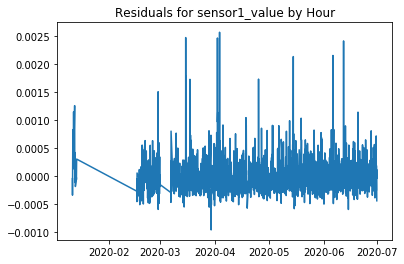

In [83]:
# Residuals plot for sensor1_value by minutes
plt.plot(df_50432_hour['local_dttm'], df_50432_hour['resid1'])
plt.title("Residuals for sensor1_value by Hour")

In [142]:
# build regression model to create residual array for sensor1_value by to run CPD on
# create residuals for sensor2_value and append them on hour df
result2 = sm.ols('sensor2_value ~ turbine_state + sensor1_value', df_50432_hour).fit()
df_50432_hour['yhat2'] = result2.fittedvalues
df_50432_hour['resid2'] = result2.resid
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:          sensor2_value   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     168.3
Date:                Sat, 22 Aug 2020   Prob (F-statistic):           1.39e-69
Time:                        23:18:17   Log-Likelihood:                 14700.
No. Observations:                2673   AIC:                        -2.939e+04
Df Residuals:                    2670   BIC:                        -2.938e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0044   8.59e-05     51.439

Text(0.5, 1.0, 'Residuals for sensor2_value by Hour')

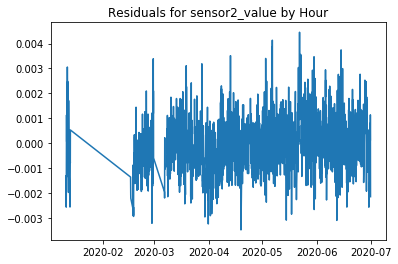

In [84]:
# Residuals plot for sensor1_value by minutes
plt.plot(df_50432_hour['local_dttm'], df_50432_hour['resid2'])
plt.title("Residuals for sensor2_value by Hour")

In [143]:
# build regression model to create residual array for sensor1_value by day to run CPD on
# create residuals for sensor1_value and append them on day df
result3 = sm.ols('sensor1_value ~ turbine_state + sensor2_value', df_50432_day).fit()
df_50432_day['yhat1'] = result3.fittedvalues
df_50432_day['resid1'] = result3.resid
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:          sensor1_value   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     10.79
Date:                Sat, 22 Aug 2020   Prob (F-statistic):           4.60e-05
Time:                        23:21:31   Log-Likelihood:                 1052.2
No. Observations:                 134   AIC:                            -2098.
Df Residuals:                     131   BIC:                            -2090.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0013    5.1e-05     24.994

Text(0.5, 1.0, 'Residuals for sensor1_value by Day')

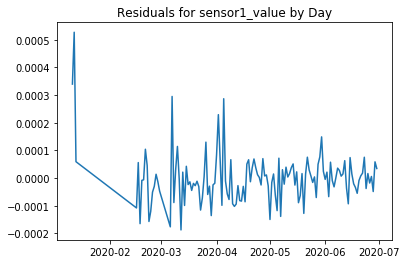

In [85]:
# Residuals plot for sensor1_value by minutes
plt.plot(df_50432_day['local_dttm'], df_50432_day['resid1'])
plt.title("Residuals for sensor1_value by Day")

In [144]:
# build regression model to create residual array for sensor2_value by day to run CPD on
# create residuals for sensor2_value and append them on day df
result4 = sm.ols('sensor2_value ~ turbine_state + sensor1_value', df_50432_day).fit()
df_50432_day['yhat2'] = result4.fittedvalues
df_50432_day['resid2'] = result4.resid
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:          sensor2_value   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     11.07
Date:                Sat, 22 Aug 2020   Prob (F-statistic):           3.60e-05
Time:                        23:22:13   Log-Likelihood:                 809.72
No. Observations:                 134   AIC:                            -1613.
Df Residuals:                     131   BIC:                            -1605.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0049      0.001      7.875

Text(0.5, 1.0, 'Residuals for sensor2_value by Day')

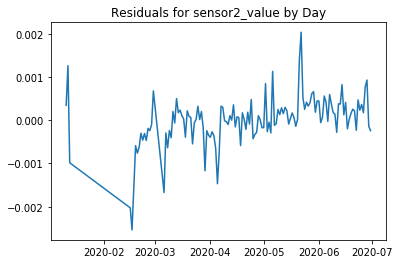

In [86]:
# Residuals plot for sensor1_value by minutes
plt.plot(df_50432_day['local_dttm'], df_50432_day['resid2'])
plt.title("Residuals for sensor2_value by Day")

In [177]:
# build regression model to create residual array for sensor1_value to run CPD on
# this adjusts for wind changes(turbine_state), autocorrelation and reduces false alarms
# create residuals and append them on minute df
result5 = sm.ols('sensor1_value ~ turbine_state + sensor2_value + s1_avg + s2_avg', df_50432_30min).fit()
df_50432_30min['yhat1'] = result5.fittedvalues
df_50432_30min['resid1'] = result5.resid
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:          sensor1_value   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     50.50
Date:                Sun, 23 Aug 2020   Prob (F-statistic):           9.28e-42
Time:                        01:08:26   Log-Likelihood:                 34137.
No. Observations:                5128   AIC:                        -6.826e+04
Df Residuals:                    5123   BIC:                        -6.823e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0013   2.74e-05     48.358

In [178]:
# build regression model to create residual array for sensor1_value to run CPD on
# this adjusts for wind changes(turbine_state), autocorrelation and reduces false alarms
# create residuals and append them on minute df
result6 = sm.ols('sensor2_value ~ turbine_state + sensor1_value + s1_avg + s2_avg', df_50432_30min).fit()
df_50432_30min['yhat2'] = result6.fittedvalues
df_50432_30min['resid2'] = result6.resid
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:          sensor2_value   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     127.5
Date:                Sun, 23 Aug 2020   Prob (F-statistic):          5.82e-104
Time:                        01:09:43   Log-Likelihood:                 27448.
No. Observations:                5128   AIC:                        -5.489e+04
Df Residuals:                    5123   BIC:                        -5.485e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0040      0.000     36.565

In [53]:
# appended min df with residuals 
df_50432_min.head()

,local_dttm,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value,yhat1,resid1,yhat2,resid2
0,2020-01-11 11:48:40,0.0,-13.21070,0.001313,-13.28666,0.003351,0.001167,0.000146,0.003619,-0.000268
1,2020-01-11 11:58:39,0.0,-13.19167,0.001132,-13.28789,0.001029,0.001195,-0.000064,0.003648,-0.002619
2,2020-01-11 12:18:40,0.0,-13.14653,0.000598,-13.27973,0.000819,0.001198,-0.000600,0.003735,-0.002916
3,2020-01-11 12:28:40,0.0,-13.13015,0.000940,-13.27320,0.001253,0.001193,-0.000253,0.003680,-0.002427
4,2020-01-11 12:38:40,0.0,-13.13181,0.001314,-13.26800,0.000831,0.001198,0.000116,0.003619,-0.002788


In [63]:
df_50432_min.isna().sum()

local_dttm         0
turbine_state     72
sensor1_health     0
sensor1_value      0
sensor2_health     0
sensor2_value      0
yhat1             72
resid1            72
yhat2             72
resid2            72
dtype: int64

In [44]:
df_min_na = df_50432_min.dropna(axis = 0, how = 'any')

In [45]:
df_50432_min = df_min_na

In [46]:
df_50432_min.shape

(14359, 10)

In [42]:
# appended hour df with residuals 
df_50432_hour.head()

,local_dttm,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value,yhat1,resid1,yhat2,resid2
0,2020-01-11 11:00:00,0.000000,-13.201185,0.001222,-13.287275,0.002190,0.001268,-0.000046,0.003503,-0.001313
1,2020-01-11 12:00:00,0.000000,-13.130836,0.000990,-13.264372,0.001104,0.001330,-0.000340,0.003677,-0.002573
2,2020-01-11 13:00:00,0.000000,-13.123875,0.001187,-13.245965,0.001784,0.001291,-0.000104,0.003530,-0.001746
3,2020-01-11 14:00:00,0.333333,-13.104523,0.001488,-13.230862,0.002420,0.001263,0.000225,0.003361,-0.000941
4,2020-01-11 15:00:00,0.000000,-13.104628,0.001381,-13.232055,0.004320,0.001148,0.000232,0.003384,0.000936


In [54]:
# appended day df with residuals 
df_50432_day.head()

,local_dttm,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value,yhat1,resid1,yhat2,resid2
0,2020-01-11,0.136986,-13.109238,0.001511,-13.245186,0.003520,0.001172,0.000340,0.003175,0.000345
1,2020-01-12,0.000000,-13.112103,0.001674,-13.248900,0.004229,0.001146,0.000527,0.002969,0.001260
2,2020-01-13,0.030303,-13.126250,0.001260,-13.247602,0.002456,0.001201,0.000059,0.003440,-0.000984
36,2020-02-16,0.000000,-13.137124,0.001119,-13.206978,0.001568,0.001227,-0.000108,0.003593,-0.002025
37,2020-02-17,0.000000,-13.174073,0.001304,-13.250137,0.000848,0.001248,0.000056,0.003384,-0.002536


In [55]:
# reset index values for dataframes to close gaps between index values
df_50432_hour = df_50432_hour.reset_index(drop = True)
df_50432_day = df_50432_day.reset_index(drop = True)

# Log Diffs

Text(0.5, 1.0, 'Log Differences for sensor1_value by Minutes')

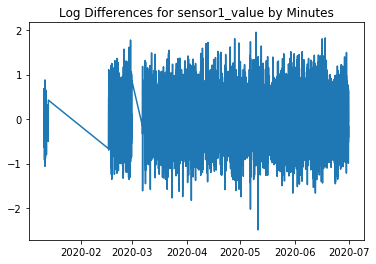

In [248]:
# Log Differences of Sensor1 by Minute
df_50432_min['diffs1']= np.log(df_50432_min['sensor1_value']).diff()

plt.plot(df_50432_min['local_dttm'], df_50432_min['diffs1'])
plt.title("Log Differences for sensor1_value by Minutes")

In [257]:
df_50432_min.isna().sum()

local_dttm         0
turbine_state     72
sensor1_health     0
sensor1_value      0
sensor2_health     0
sensor2_value      0
yhat1             72
resid1            72
yhat2             72
resid2            72
diffs1             1
diffs2             1
dtype: int64

In [258]:
df_50432_min_na = df_50432_min.dropna(axis = 0)

In [259]:
df_50432_min_na.shape

(14358, 12)

In [260]:
df_50432_min = df_50432_min_na

Text(0.5, 1.0, 'Log Differences for sensor2_value by Minutes')

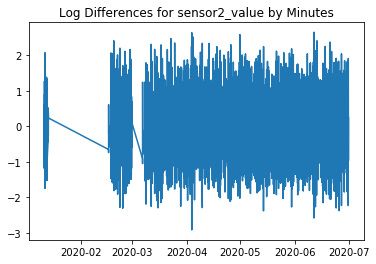

In [250]:
# Log Differences of Sensor2 by Minute
df_50432_min['diffs2']= np.log(df_50432_min['sensor2_value']).diff()

plt.plot(df_50432_min['local_dttm'], df_50432_min['diffs2'])
plt.title("Log Differences for sensor2_value by Minutes")

Text(0.5, 1.0, 'Log Differences for sensor1_value by Hour')

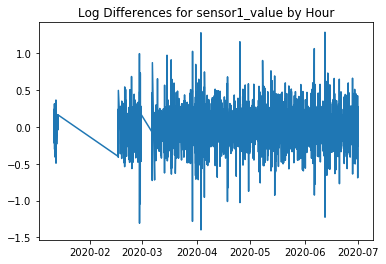

In [251]:
# Log Differences of Sensor1 by Hour
df_50432_hour['diffs1']= np.log(df_50432_hour['sensor1_value']).diff()

plt.plot(df_50432_hour['local_dttm'], df_50432_hour['diffs1'])
plt.title("Log Differences for sensor1_value by Hour")

Text(0.5, 1.0, 'Log Differences for sensor2_value by Hour')

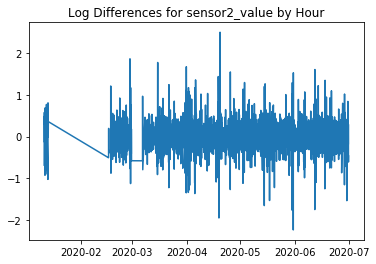

In [252]:
# Log Differences of Sensor2 by Hour
df_50432_hour['diffs2']= np.log(df_50432_hour['sensor2_value']).diff()

plt.plot(df_50432_hour['local_dttm'], df_50432_hour['diffs2'])
plt.title("Log Differences for sensor2_value by Hour")

In [261]:
df_50432_hour.isna().sum()

local_dttm        0
turbine_state     0
sensor1_health    0
sensor1_value     0
sensor2_health    0
sensor2_value     0
yhat1             0
resid1            0
yhat2             0
resid2            0
diffs1            1
diffs2            1
dtype: int64

In [262]:
df_50432_hour = df_50432_hour.dropna(axis = 0)

Text(0.5, 1.0, 'Log Differences for sensor1_value by Day')

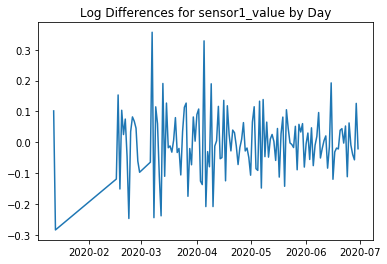

In [254]:
# Log Differences of Sensor1 by Day
df_50432_day['diffs1']= np.log(df_50432_day['sensor1_value']).diff()

plt.plot(df_50432_day['local_dttm'], df_50432_day['diffs1'])
plt.title("Log Differences for sensor1_value by Day")

Text(0.5, 1.0, 'Log Differences for sensor2_value by Day')

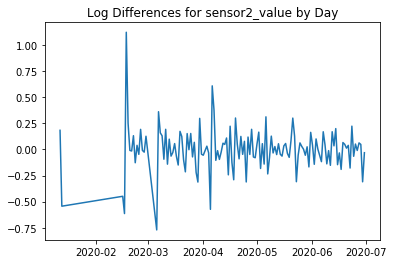

In [255]:
# Log Differences of Sensor2 by Day
df_50432_day['diffs2']= np.log(df_50432_day['sensor2_value']).diff()

plt.plot(df_50432_day['local_dttm'], df_50432_day['diffs2'])
plt.title("Log Differences for sensor2_value by Day")

In [263]:
df_50432_day.isna().sum()

local_dttm        0
turbine_state     0
sensor1_health    0
sensor1_value     0
sensor2_health    0
sensor2_value     0
yhat1             0
resid1            0
yhat2             0
resid2            0
diffs1            1
diffs2            1
dtype: int64

In [264]:
df_50432_day = df_50432_day.dropna(axis = 0)

# Change Point Detection Model

In [146]:
# import rpy2 libraries to run "cpm" changepoint detection algorithm in Python
import rpy2
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.packages import importr
base = importr('base')
ts=robjects.r('ts')

In [147]:
from functools import partial

In [148]:
# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

packnames = ('cpm')

# R vector of strings
from rpy2.robjects.vectors import StrVector


names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

# import "cpm" package
importr('cpm', lib_loc="C:/Users/Jwpel/Documents/R/win-library/4.0")

# call libraries and assign functions from R to Python objects

library = robjects.r['library']

cpm = library('cpm')

detectChangePoint = robjects.r["detectChangePoint"]

detectChangePointBatch = robjects.r["detectChangePointBatch"]

cpmReset = robjects.r["cpmReset"]

processStream = robjects.r["processStream"]

from rpy2.robjects import pandas2ri

pandas2ri.activate()

<rpy2.rinterface_lib.sexp.NULLType object at 0x00000138E10ADE08> [RTYPES.NILSXP]

# CPD Sensor 1 by Minutes

In [389]:
# Run processStream CPD on sensor1_value (residuals) with "Mood" test
# assign results to list object with changepoints and detection times
diff_min_1 = (processStream(df_50432_min.diffs1, "Mood", ARL0=20000, startup=100))
print(diff_min_1)

$x
            1             2             3             4             5 
-1.488862e-01 -6.372642e-01  4.518029e-01  3.348674e-01 -6.282517e-01 
            6             7             8             9            10 
 6.884231e-01 -2.117724e-01 -5.382576e-02  3.588693e-01 -2.311633e-01 
           11            12            13            14            15 
-2.787242e-02 -1.754867e-01  3.666935e-01 -2.349452e-03 -2.599301e-01 
           16            17            18            19            20 
 7.705178e-02  6.830378e-01 -5.044720e-01 -6.548275e-02  3.739970e-02 
           21            22            23            24            25 
-5.042726e-03  8.699853e-02 -2.311026e-01  2.326974e-01  5.071938e-01 
           26            27            28            29            30 
-9.211239e-01  2.281129e-01  2.056594e-01  2.638353e-01  1.109448e-01 
           31            32            33            34            35 
-2.176135e-01 -3.383777e-01  1.127162e-01  2.214425e-01 -1.712215e-01 
   

In [390]:
# convert changepoints to array to use as index values in df_50432_min
changepoints_0 = np.asarray(diff_min_1[1])
changepoints_0
# convert detecttimes to array 
detecttimes_0 = np.asarray(diff_min_1[2])

In [391]:
# use changepoint values to index local_dttm values from dataframe, assign to 

cp_m1 = df_50432_min.iloc[changepoints_0, [0]]
dt_m1 = df_50432_min.iloc[detecttimes_0, [0]]


cp_m1_reset = cp_m1.reset_index(drop = True)
dt_m1_reset = dt_m1.reset_index(drop = True)
cpt_m1 = pd.concat([cp_m1_reset, dt_m1_reset], axis=1)
cpt_m1.columns = ['changept', 'detectpoint']
cpt_m1['detecttime'] = cpt_m1['detectpoint'] - cpt_m1['changept']
cpt_m1

,changept,detectpoint,detecttime
0,2020-02-18 02:45:28,2020-02-20 15:35:25,2 days 12:49:57
1,2020-02-23 16:55:21,2020-02-24 02:35:21,0 days 09:40:00
2,2020-02-25 02:15:20,2020-02-25 04:25:20,0 days 02:10:00
3,2020-02-25 04:35:20,2020-02-25 21:25:19,0 days 16:49:59
4,2020-02-27 04:25:17,2020-02-27 08:45:17,0 days 04:20:00
5,2020-03-12 02:36:01,2020-03-12 15:06:01,0 days 12:30:00
6,2020-03-13 16:06:00,2020-03-14 01:35:59,0 days 09:29:59
7,2020-03-19 20:25:53,2020-03-20 12:35:51,0 days 16:09:58
8,2020-03-29 18:35:41,2020-03-30 11:26:41,0 days 16:51:00
9,2020-03-30 17:56:40,2020-03-30 20:16:41,0 days 02:20:01


In [392]:
cpt_m1['detecttime'].mean()

Timedelta('0 days 18:54:28.040000')

In [393]:
# convert local_dttm to datetime to plot on time series
cpd_m1 = pd.to_datetime(cp_m1['local_dttm'])

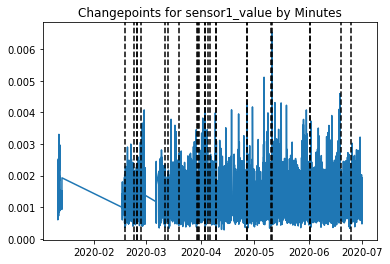

In [394]:
# plot the changepoints on time series for sensor1_value by minutes
plt.plot(df_50432_min['local_dttm'], df_50432_min['sensor1_value'])
plt.title("Changepoints for sensor1_value by Minutes")
for xc in cpd_m1:
    plt.axvline(x=xc, color='k', linestyle='--')

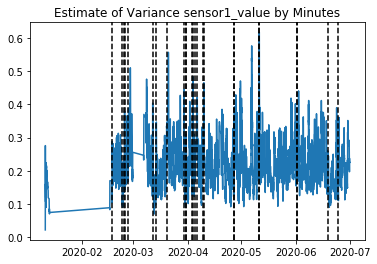

In [396]:
# square residuals for ewma processing
df_50432_min['diff1_sq'] = df_50432_min['diffs1']**2

# Estimate of Variance and append to min df
df_50432_min['ewma1'] = pd.Series.ewm(df_50432_min["diff1_sq"], span = 50).mean()
# plot the changepoints on time series for sensor1_value by hour
plt.plot(df_50432_min['local_dttm'], df_50432_min['ewma1'])
plt.title("Estimate of Variance sensor1_value by Minutes")
for xc in cpd_m1:
    plt.axvline(x=xc, color='k', linestyle='--')

# CPD Sensor2 by Minutes

In [385]:
# Run processStream CPD on sensor1_value (residuals) with "Mood" test
# assign results to list object with changepoints and detection times
diff_min_2 = (processStream(df_50432_min.diffs2, "Mood", ARL0=20000, startup=100))
print(diff_min_2)

$x
            1             2             3             4             5 
-1.180568e+00 -2.288852e-01  4.252566e-01 -4.106608e-01  6.179074e-01 
            6             7             8             9            10 
-3.579324e-01  4.068648e-01  1.730794e-01 -1.962039e-01  2.149800e-02 
           11            12            13            14            15 
 2.039885e-01  5.490075e-04 -2.862606e-02 -3.402375e-01  5.515128e-01 
           16            17            18            19            20 
-1.156622e+00  1.233282e+00  7.663088e-01 -4.133773e-01  1.013861e-01 
           21            22            23            24            25 
-4.721231e-01  5.549388e-02  1.270520e+00 -9.924489e-01 -1.576940e-01 
           26            27            28            29            30 
 1.322983e-01  3.460500e-01  2.342808e-02 -7.660618e-02 -1.288263e-02 
           31            32            33            34            35 
 1.008423e-01  5.332686e-02 -1.148113e-01 -3.137530e-01 -2.353238e-01 
   

In [397]:
# convert changepoints to array to use as index values in df_50432_min
changepoints = np.asarray(diff_min_2[1])
changepoints
# convert detecttimes to array 
detecttimes = np.asarray(diff_min_2[2])

In [398]:
# use changepoint values to index local_dttm values from dataframe, assign to 

cp_m2 = df_50432_min.iloc[changepoints, [0]]
dt_m2 = df_50432_min.iloc[detecttimes, [0]]


cp_m2_reset = cp_m2.reset_index(drop = True)
dt_m2_reset = dt_m2.reset_index(drop = True)
cpt_m2 = pd.concat([cp_m2_reset, dt_m2_reset], axis=1)
cpt_m2.columns = ['changept', 'detectpoint']
cpt_m2['detecttime'] = cpt_m2['detectpoint'] - cpt_m2['changept']
cpt_m2

,changept,detectpoint,detecttime
0,2020-02-18 23:45:26,2020-02-19 02:15:26,0 days 02:30:00
1,2020-02-20 04:15:25,2020-02-21 14:35:23,1 days 10:19:58
2,2020-02-24 18:15:20,2020-02-24 19:15:20,0 days 01:00:00
3,2020-02-24 19:15:20,2020-02-25 12:35:19,0 days 17:19:59
4,2020-03-12 10:46:02,2020-03-12 19:06:01,0 days 08:19:59
5,2020-03-13 17:36:00,2020-03-13 19:55:59,0 days 02:19:59
6,2020-03-14 03:36:00,2020-03-14 11:45:59,0 days 08:09:59
7,2020-03-14 18:05:59,2020-03-14 23:15:58,0 days 05:09:59
8,2020-03-28 08:45:43,2020-03-28 13:05:43,0 days 04:20:00
9,2020-03-28 13:05:43,2020-03-29 21:35:41,1 days 08:29:58


In [399]:
cpt_m2['detecttime'].mean()

Timedelta('0 days 13:58:00.354838')

In [400]:
# convert local_dttm to datetime to plot on time series
cpd_m2 = pd.to_datetime(cp_m2['local_dttm'])

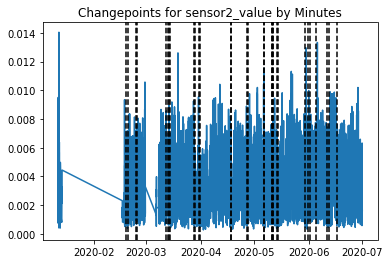

In [401]:
# plot the changepoints on time series for sensor1_value by minutes
plt.plot(df_50432_min['local_dttm'], df_50432_min['sensor2_value'])
plt.title("Changepoints for sensor2_value by Minutes")
for xc in cpd_m2:
    plt.axvline(x=xc, color='k', linestyle='--')

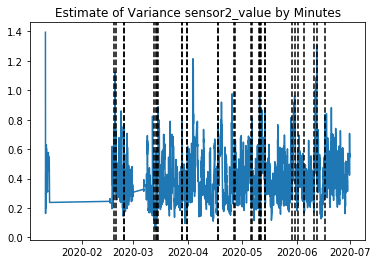

In [402]:
# square residuals for ewma processing
df_50432_min['diff2_sq'] = df_50432_min['diffs2']**2
# Estimate of Variance and append to min df
df_50432_min['ewma2'] = pd.Series.ewm(df_50432_min["diff2_sq"], span = 50).mean()
# plot the changepoints on time series for sensor1_value by hour
plt.plot(df_50432_min['local_dttm'], df_50432_min['ewma2'])
plt.title("Estimate of Variance sensor2_value by Minutes")
for xc in cpd_m2:
    plt.axvline(x=xc, color='k', linestyle='--')

# CPD Sensor1 by Hour

In [408]:
# Run processStream CPD on sensor1_value (residuals) with "Mood" test
# assign results to list object with changepoints and detection times
diff_hr_1 = (processStream(df_50432_hour.diffs1, "Mood", ARL0=5000, startup=20))
print(diff_hr_1)

$x
            1             2             3             4             5 
-2.111412e-01  1.815713e-01  2.260121e-01 -7.467105e-02  2.367003e-01 
            6             7             8             9            10 
-5.389716e-02 -4.823633e-02  3.001710e-02 -2.037922e-01  3.161143e-01 
           11            12            13            14            15 
 5.251494e-02 -3.023908e-01  2.579461e-01 -4.057285e-01  2.865819e-01 
           16            17            18            19            20 
 3.044577e-01 -1.862640e-01 -1.848314e-01 -7.644012e-02  2.320282e-01 
           21            30            31            32            33 
 1.289847e-03  3.673719e-01 -4.913038e-01 -3.377322e-01  3.092859e-01 
           39            40            52            53            54 
-1.268035e-01 -2.313971e-01  1.669134e-01 -7.655607e-03 -3.780970e-02 
           55            56            57           871           872 
 7.246329e-02 -3.674694e-02  1.659988e-01 -3.991656e-01  2.431941e-01 
   

In [409]:
# convert changepoints to array to use as index values in df_50432_hour
changepoints_1 = np.asarray(diff_hr_1[1])
changepoints_1
# convert detecttimes to array 
detecttimes_1 = np.asarray(diff_hr_1[2])

In [410]:
# use changepoint values to index local_dttm values from dataframe, assign to 
detecttimes_1 = np.asarray(diff_hr_1[2])
cp_h1 = df_50432_hour.iloc[changepoints_1, [0]]
dt_h1 = df_50432_hour.iloc[detecttimes_1, [0]]


cp_h1_reset = cp_h1.reset_index(drop = True)
dt_h1_reset = dt_h1.reset_index(drop = True)
cpt_h1 = pd.concat([cp_h1_reset, dt_h1_reset], axis=1)
cpt_h1.columns = ['changept', 'detectpoint']
cpt_h1['detecttime'] = cpt_h1['detectpoint'] - cpt_h1['changept']
cpt_h1

,changept,detectpoint,detecttime
0,2020-02-28 18:00:00,2020-02-28 23:00:00,0 days 05:00:00
1,2020-03-08 08:00:00,2020-03-09 08:00:00,1 days 00:00:00
2,2020-03-13 21:00:00,2020-03-14 09:00:00,0 days 12:00:00
3,2020-03-28 20:00:00,2020-03-29 17:00:00,0 days 21:00:00
4,2020-03-29 17:00:00,2020-03-30 09:00:00,0 days 16:00:00
5,2020-03-31 07:00:00,2020-03-31 11:00:00,0 days 04:00:00
6,2020-03-31 15:00:00,2020-04-01 07:00:00,0 days 16:00:00
7,2020-04-01 15:00:00,2020-04-01 19:00:00,0 days 04:00:00
8,2020-04-18 06:00:00,2020-04-18 22:00:00,0 days 16:00:00
9,2020-04-18 22:00:00,2020-04-20 15:00:00,1 days 17:00:00


In [411]:
cpt_h1['detecttime'].mean()

Timedelta('0 days 17:16:00')

In [412]:
# convert local_dttm to datetime to plot on time series
cpd_h1 = pd.to_datetime(cp_h1['local_dttm'])

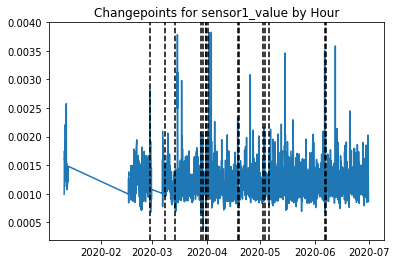

In [413]:
# plot the changepoints on time series for sensor1_value by hour
plt.plot(df_50432_hour['local_dttm'], df_50432_hour['sensor1_value'])
plt.title("Changepoints for sensor1_value by Hour")
for xc in cpd_h1:
    plt.axvline(x=xc, color='k', linestyle='--')

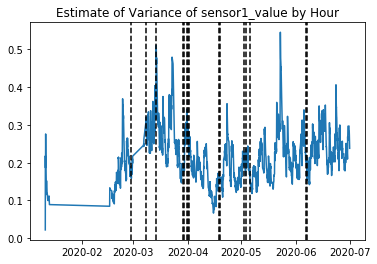

In [414]:
# square residuals for ewma processing
df_50432_hour['diff1_sq'] = df_50432_min['diffs1']**2
df_50432_hour['ewma1'] = pd.Series.ewm(df_50432_hour["diff1_sq"], span = 50).mean()
# plot the changepoints on time series for sensor1_value by hour
plt.plot(df_50432_hour['local_dttm'], df_50432_hour['ewma1'])
plt.title("Estimate of Variance of sensor1_value by Hour")
for xc in cpd_h1:
    plt.axvline(x=xc, color='k', linestyle='--')

# CPD on Sensor2 by Hour

In [415]:
# Run processStream CPD on sensor2_value (residuals) with "Mood" test
# assign results to list object with changepoints and detection times
diff_hr_2 = (processStream(df_50432_hour.diffs2, "Mood", ARL0=5000, startup=20))
print(diff_hr_2)

$x
            1             2             3             4             5 
-0.6850581817  0.4797617993  0.3052100194  0.5794001864 -0.0197055382 
            6             7             8             9            10 
-0.1358765414 -0.1159035806  0.2959682061 -0.0421260835  0.2132571597 
           11            12            13            14            15 
 0.0226582542 -0.9268790528  0.6854517171  0.2755299031 -0.2291675165 
           16            17            18            19            20 
 0.2748827412 -0.1531006724 -0.1132287922 -0.3279780476  0.5496542727 
           21            30            31            32            33 
-0.9041540650 -0.5616591818 -0.0224413632  0.7693785948  0.6073103952 
           39            40            52            53            54 
-0.8057514682  0.1232161154 -1.0257964602  0.8069818103  0.0574431595 
           55            56            57           871           872 
 0.2377097295 -0.0118772614  0.3578161976 -0.5074933579 -0.4835748440 
   

In [416]:
# convert changepoints to array to use as index values in df_50432_hour
changepoints_2 = np.asarray(diff_hr_2[1])
changepoints_2

array([  39,  282,  312,  471,  800,  804,  821,  847,  899,  909,  954,
        962, 1157, 1165, 1996, 2013, 2076, 2145, 2156, 2265, 2412, 2418],
      dtype=int32)

In [417]:
# use changepoint values to index local_dttm values from dataframe, assign to 
cp_h2 = df_50432_hour.iloc[changepoints_2, [0]]

In [294]:
cp_h2

,local_dttm
902,2020-02-18 01:00:00
1159,2020-02-28 18:00:00
1365,2020-03-08 08:00:00
1531,2020-03-15 06:00:00
1920,2020-03-31 11:00:00
2027,2020-04-04 22:00:00
2059,2020-04-06 06:00:00
2347,2020-04-18 06:00:00
2380,2020-04-19 15:00:00
3350,2020-05-30 01:00:00


In [418]:
# use changepoint values to index local_dttm values from dataframe, assign to 
detecttimes_2 = np.asarray(diff_hr_2[2])
# index locl_dttm values of changepoints and detecttimes and assign to df
cp_h2 = df_50432_hour.iloc[changepoints_2, [0]]
dt_h2 = df_50432_hour.iloc[detecttimes_2, [0]]
# concatenate changepoint times and detecttimes
# reset indexes to calculate average detection delay time
cp_h2_reset = cp_h2.reset_index(drop = True)
dt_h2_reset = dt_h2.reset_index(drop = True)
cpt_h2 = pd.concat([cp_h2_reset, dt_h2_reset], axis=1)
cpt_h2.columns = ['changept', 'detectpoint']
cpt_h2['detecttime'] = cpt_h2['detectpoint'] - cpt_h2['changept']
cpt_h2

,changept,detectpoint,detecttime
0,2020-02-18 01:00:00,2020-02-21 23:00:00,3 days 22:00:00
1,2020-02-28 18:00:00,2020-02-29 11:00:00,0 days 17:00:00
2,2020-03-08 08:00:00,2020-03-09 10:00:00,1 days 02:00:00
3,2020-03-15 06:00:00,2020-03-17 11:00:00,2 days 05:00:00
4,2020-03-31 11:00:00,2020-03-31 15:00:00,0 days 04:00:00
5,2020-03-31 15:00:00,2020-04-01 13:00:00,0 days 22:00:00
6,2020-04-01 09:00:00,2020-04-01 20:00:00,0 days 11:00:00
7,2020-04-02 15:00:00,2020-04-04 01:00:00,1 days 10:00:00
8,2020-04-04 22:00:00,2020-04-05 19:00:00,0 days 21:00:00
9,2020-04-06 06:00:00,2020-04-06 19:00:00,0 days 13:00:00


In [419]:
cpt_h2['detecttime'].mean()

Timedelta('1 days 03:40:54.545454')

In [420]:
# convert local_dttm to datetime to plot on time series
cpd_h2 = pd.to_datetime(cp_h2['local_dttm'])

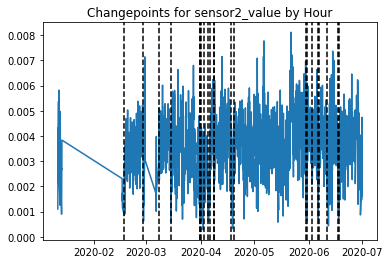

In [421]:
# plot the changepoints on time series for sensor1_value by hour
plt.plot(df_50432_hour['local_dttm'], df_50432_hour['sensor2_value'])
plt.title("Changepoints for sensor2_value by Hour")
for xc in cpd_h2:
    plt.axvline(x=xc, color='k', linestyle='--')

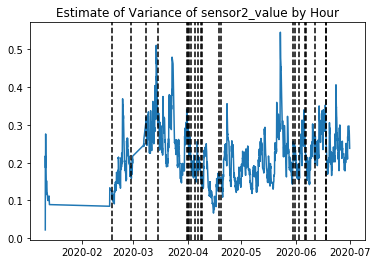

In [422]:
# square residuals for ewma processing
df_50432_hour['diff2_sq'] = df_50432_min['diffs1']**2
df_50432_hour['ewma2'] = pd.Series.ewm(df_50432_hour["diff2_sq"], span = 50).mean()
# plot the changepoints on time series for sensor1_value by hour
plt.plot(df_50432_hour['local_dttm'], df_50432_hour['ewma2'])
plt.title("Estimate of Variance of sensor2_value by Hour")
for xc in cpd_h2:
    plt.axvline(x=xc, color='k', linestyle='--')

#  CPD Sensor1 by Day

In [442]:
# Run processStream CPD on sensor1_value by day (residuals) with "Mood" test
# assign results to list object with changepoints and detection times
diff_d_1 = (processStream(df_50432_day.diffs1, "Mood", ARL0=100, startup=20))
print(diff_d_1)

$x
           1            2           36           37           38           39 
 0.101889307 -0.283831938 -0.118904575  0.153557056 -0.151149461  0.104016409 
          40           41           42           43           44           45 
 0.025236350  0.075435465 -0.045524113 -0.246780696  0.034472816  0.082492650 
          46           47           48           49           55           56 
 0.068691064  0.045837483 -0.060757557 -0.096970779 -0.064366231  0.356876852 
          57           58           59           60           61           62 
-0.244102842  0.115104157  0.060512528 -0.108726923 -0.238144389  0.190828722 
          63           64           65           66           67           68 
-0.110078247  0.127301789 -0.017452536 -0.011598225 -0.031775938  0.006750826 
          69           70           71           72           73           74 
 0.080203905 -0.032928184 -0.019678497 -0.105678546  0.034484298  0.113541855 
          75           76           77           

In [443]:
# convert changepoints to array to use as index values in df_50432_day
changepoints_3 = np.asarray(diff_d_1[1])
changepoints_3

array([26, 45, 52, 76, 80], dtype=int32)

In [444]:
# use changepoint values to index local_dttm values from dataframe, assign to new variable
cp_d1 = df_50432_day.iloc[changepoints_3, [0]]

In [445]:
# use changepoint values to index local_dttm values from dataframe, assign to 
detecttimes_3 = np.asarray(diff_d_1[2])
cp_d1 = df_50432_day.iloc[changepoints_3, [0]]
dt_d1 = df_50432_day.iloc[detecttimes_3, [0]]


cp_d1_reset = cp_d1.reset_index(drop = True)
dt_d1_reset = dt_d1.reset_index(drop = True)
cpt_d1 = pd.concat([cp_d1_reset, dt_d1_reset], axis=1)
cpt_d1.columns = ['changept', 'detectpoint']
cpt_d1['detecttime'] = cpt_d1['detectpoint'] - cpt_d1['changept']
cpt_d1

,changept,detectpoint,detecttime
0,2020-03-16,2020-03-23,7 days
1,2020-04-04,2020-04-07,3 days
2,2020-04-11,2020-04-26,15 days
3,2020-05-05,2020-05-09,4 days
4,2020-05-09,2020-05-26,17 days


In [446]:
cpt_d1['detecttime'].mean()

Timedelta('9 days 04:48:00')

In [447]:
cp_d1

,local_dttm
65,2020-03-16
84,2020-04-04
91,2020-04-11
115,2020-05-05
119,2020-05-09


In [448]:
# convert local_dttm to datetime to plot on time series
cpd_d1 = pd.to_datetime(cp_d1['local_dttm'])

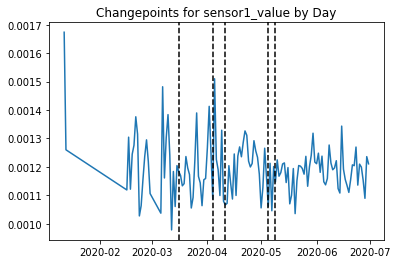

In [451]:
# plot the changepoints on time series for sensor1_value by hour
plt.plot(df_50432_day['local_dttm'], df_50432_day['sensor1_value'])
plt.title("Changepoints for sensor1_value by Day")
for xc in cpd_d1:
    plt.axvline(x=xc, color='k', linestyle='--')

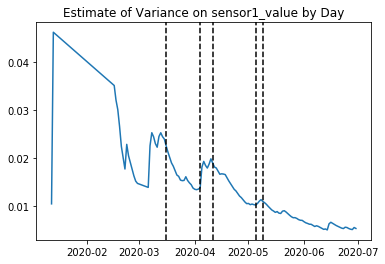

In [450]:
# square residuals for ewma processing
df_50432_day['diff1_sq'] = df_50432_day['diffs1']**2

df_50432_day['ewma1'] = pd.Series.ewm(df_50432_day["diff1_sq"], span = 50).mean()
# plot the changepoints on time series for sensor1_value by hour
plt.plot(df_50432_day['local_dttm'], df_50432_day['ewma1'])
plt.title("Estimate of Variance on sensor1_value by Day")
for xc in cpd_d1:
    plt.axvline(x=xc, color='k', linestyle='--')

# CPD on Sensor2 by Day

In [471]:
# Run processStream CPD on sensor1_value by day (residuals) with "Mood" test
# assign results to list object with changepoints and detection times
diff_d_2 = (processStream(df_50432_day.diffs2, "Mood", ARL0=100, startup=20))
print(diff_d_2)

$x
           1            2           36           37           38           39 
 0.183407855 -0.543506970 -0.448621698 -0.614139399  1.123169418  0.252382514 
          40           41           42           43           44           45 
-0.009075853 -0.014584489  0.131950825 -0.127286460  0.039813624 -0.046664090 
          46           47           48           49           55           56 
 0.192710739 -0.008833502 -0.025627406  0.126716054 -0.770785073  0.361711398 
          57           58           59           60           61           62 
 0.159287029  0.131180152 -0.093459839  0.193200379 -0.140764548  0.098764257 
          63           64           65           66           67           68 
-0.063654670 -0.028617477  0.056454796 -0.066129765 -0.148952116  0.173511286 
          69           70           71           72           73           74 
 0.124029926 -0.099473383 -0.214338407  0.152289118 -0.002242095  0.153110460 
          75           76           77           

In [463]:
df_50432_day['ewma2'] = pd.Series.ewm(df_50432_day["diffs2"], span = 50).mean()

In [464]:
df_50432_day.head()

,local_dttm,turbine_state,sensor1_health,sensor1_value,sensor2_health,sensor2_value,yhat1,resid1,yhat2,resid2,diffs1,diffs2,diff1_sq,ewma1,diff2_sq,ewma2
1,2020-01-12,0.000000,-13.112103,0.001674,-13.248900,0.004229,0.001146,0.000527,0.002969,0.001260,0.101889,0.183408,0.010381,0.010381,0.033638,0.183408
2,2020-01-13,0.030303,-13.126250,0.001260,-13.247602,0.002456,0.001201,0.000059,0.003440,-0.000984,-0.283832,-0.543507,0.080561,0.046173,0.295400,-0.187319
36,2020-02-16,0.000000,-13.137124,0.001119,-13.206978,0.001568,0.001227,-0.000108,0.003593,-0.002025,-0.118905,-0.448622,0.014138,0.035065,0.201261,-0.277927
37,2020-02-17,0.000000,-13.174073,0.001304,-13.250137,0.000848,0.001248,0.000056,0.003384,-0.002536,0.153557,-0.614139,0.023580,0.032019,0.377167,-0.367089
38,2020-02-18,3.171429,-13.077762,0.001121,-13.194223,0.002609,0.001286,-0.000165,0.004152,-0.001543,-0.151149,1.123169,0.022846,0.030035,1.261510,-0.044726


In [465]:
# convert changepoints to array to use as index values in df_50432_day
changepoints_4 = np.asarray(diff_d_2[1])
changepoints_4

array([ 6, 38, 81], dtype=int32)

In [466]:
# use changepoint values to index local_dttm values from dataframe, assign to new variable
cp_d2 = df_50432_day.iloc[changepoints_4, [0]]
cp_d2

,local_dttm
40,2020-02-20
77,2020-03-28
120,2020-05-10


In [467]:
# use changepoint values to index local_dttm values from dataframe, assign to 
detecttimes_4 = np.asarray(diff_d_2[2])
cp_d2 = df_50432_day.iloc[changepoints_4, [0]]
dt_d2 = df_50432_day.iloc[detecttimes_4, [0]]


cp_d2_reset = cp_d2.reset_index(drop = True)
dt_d2_reset = dt_d2.reset_index(drop = True)
cpt_d2 = pd.concat([cp_d2_reset, dt_d2_reset], axis=1)
cpt_d2.columns = ['changept', 'detectpoint']
cpt_d2['detecttime'] = cpt_d2['detectpoint'] - cpt_d2['changept']
cpt_d2

,changept,detectpoint,detecttime
0,2020-02-20,2020-03-15,24 days
1,2020-03-28,2020-03-31,3 days
2,2020-05-10,2020-05-19,9 days


In [468]:
cpt_d2['detecttime'].mean()

Timedelta('12 days 00:00:00')

In [459]:
# convert local_dttm to datetime to plot on time series
cpd_d2 = pd.to_datetime(cp_d2['local_dttm'])

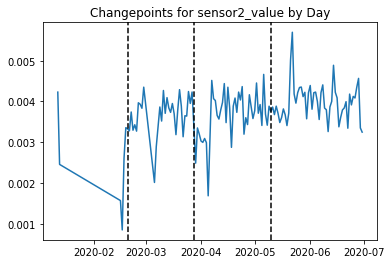

In [460]:
# plot the changepoints on time series for sensor1_value by hour
plt.plot(df_50432_day['local_dttm'], df_50432_day['sensor2_value'])
plt.title("Changepoints for sensor2_value by Day")
for xc in cpd_d2:
    plt.axvline(x=xc, color='k', linestyle='--')

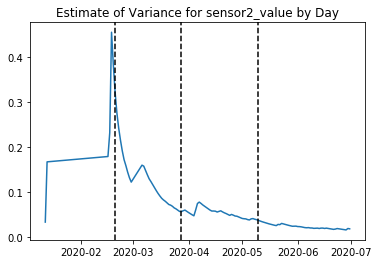

In [461]:
# square residuals for ewma processing
df_50432_day['diff2_sq'] = df_50432_day['diffs2']**2
df_50432_day['ewma2'] = pd.Series.ewm(df_50432_day["diff2_sq"], span = 50).mean()
# plot the changepoints on time series for sensor1_value by hour
plt.plot(df_50432_day['local_dttm'], df_50432_day['ewma2'])
plt.title("Estimate of Variance for sensor2_value by Day")
for xc in cpd_d2:
    plt.axvline(x=xc, color='k', linestyle='--')

In [473]:
file = "df_50432_min"
path = (r"C:\Users\Jwpel\Documents\DSC680")

df_50432_min.to_csv(os.path.join(path, file), sep=",", encoding = "latin1", index = False)
print("LOCATION" + path)
print("FILENAME" + file)
print()

LOCATIONC:\Users\Jwpel\Documents\DSC680
FILENAMEdf_50432_min



In [152]:
# Run processStream CPD on sensor1_value (residuals) with "Mood" test
# assign results to list object with changepoints and detection times
sen_min_1 = (processStream(df_50432_min.sensor1_value, "Mood", ARL0=5000, startup=100))
print(sen_min_1)

$x
           0            1            2            3            4            5 
0.0013132460 0.0011315810 0.0005983087 0.0009400281 0.0013139290 0.0007010123 
           6            7            8            9           10           11 
0.0013954170 0.0011291000 0.0010699320 0.0015318320 0.0012156770 0.0011822610 
          12           13           14           15           16           17 
0.0009919744 0.0014313750 0.0014280160 0.0011011510 0.0011893510 0.0023547760 
          18           19           20           21           22           23 
0.0014218710 0.0013317460 0.0013824960 0.0013755420 0.0015005720 0.0011909410 
          24           25           26           27           28           29 
0.0015029670 0.0024958640 0.0009935321 0.0012481020 0.0015330870 0.0019959470 
          30           31           32           33           34           35 
0.0022301380 0.0017940040 0.0012789920 0.0014315940 0.0017864510 0.0015053260 
          36           37           38           

In [153]:
# convert changepoints to array to use as index values in df_50432_min
changepoints_5 = np.asarray(sen_min_1[1])
changepoints_5
# convert detecttimes to array 
detecttimes_5 = np.asarray(sen_min_1[2])

In [166]:
# use changepoint values to index local_dttm values from dataframe, assign to 

cps_m1 = df_50432_min.iloc[changepoints_5, [0]]
dts_m1 = df_50432_min.iloc[detecttimes_5, [0]]
#cps_m1 = pd.concat([cps_m1, dts_m1], axis=1)

cps_m1_reset = cps_m1.reset_index(drop = True)
dts_m1_reset = dts_m1.reset_index(drop = True)
cpts_m1 = pd.concat([cps_m1_reset, dts_m1_reset], axis=1)

cpts_m1.columns = ['changept', 'detectpoint']
cpts_m1['detecttime'] = cpts_m1['detectpoint'] - cpts_m1['changept']
cpts_m1

,changept,detectpoint,detecttime
0,2020-02-17 23:55:28,2020-02-18 01:55:28,0 days 02:00:00
1,2020-02-23 21:25:21,2020-02-23 22:55:21,0 days 01:30:00
2,2020-02-26 14:15:18,2020-02-26 15:15:18,0 days 01:00:00
3,2020-03-09 22:36:04,2020-03-09 23:56:04,0 days 01:20:00
4,2020-03-10 00:56:03,2020-03-11 06:06:02,1 days 05:09:59
5,2020-03-11 20:06:02,2020-03-12 01:06:02,0 days 05:00:00
6,2020-03-12 02:26:01,2020-03-12 12:46:01,0 days 10:20:00
7,2020-03-13 15:36:00,2020-03-13 18:35:59,0 days 02:59:59
8,2020-03-15 06:55:58,2020-03-15 11:55:58,0 days 05:00:00
9,2020-03-15 11:55:58,2020-03-16 05:15:57,0 days 17:19:59


In [167]:
cpts_m1['detecttime'].mean()

Timedelta('0 days 17:19:23.133333')

In [168]:
# convert local_dttm to datetime to plot on time series
cps_m1 = pd.to_datetime(cps_m1['local_dttm'])

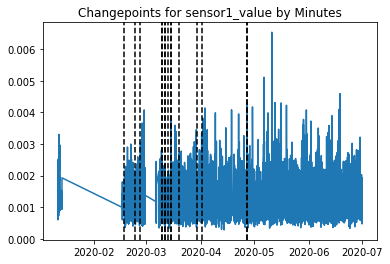

In [169]:
# plot the changepoints on time series for sensor1_value by minutes
plt.plot(df_50432_min['local_dttm'], df_50432_min['sensor1_value'])
plt.title("Changepoints for sensor1_value by Minutes")
for xc in cps_m1:
    plt.axvline(x=xc, color='k', linestyle='--')